In [3]:
import pandas as pd

In [4]:
raw_df = pd.read_csv("diabetes.csv")
raw_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [23]:
print("train_df shape: ", train_df.shape)
print("val_df shape: ", val_df.shape)
print("test_df shape: ", test_df.shape)

train_df shape:  (460, 9)
val_df shape:  (154, 9)
test_df shape:  (154, 9)


In [26]:
input_cols = list(train_df.columns)[:-1]
target_col = 'Outcome'

In [27]:
train_inputs = train_df[input_cols].copy()
train_target = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_target = val_df[target_col].copy()

test_inputs = test_df[input_cols].copy()
test_target = test_df[target_col].copy()

In [28]:
import numpy as np

In [29]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()

In [30]:
from sklearn.impute import SimpleImputer

In [75]:
imputer = SimpleImputer(strategy='mean')
imputer.fit(raw_df[numeric_cols])

SimpleImputer()

In [33]:
list[imputer.statistics_]

list[array([  3.84505208, 120.89453125,  69.10546875,  20.53645833,
        79.79947917,  31.99257812,   0.4718763 ,  33.24088542])]

In [34]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [37]:
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

In [38]:
print("Minimum: ")
list(scaler.data_min_)

Minimum: 


[np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.078),
 np.float64(21.0)]

In [39]:
print("Maximum: ")
list(scaler.data_max_)

Maximum: 


[np.float64(17.0),
 np.float64(199.0),
 np.float64(122.0),
 np.float64(99.0),
 np.float64(846.0),
 np.float64(67.1),
 np.float64(2.42),
 np.float64(81.0)]

In [40]:
train_inputs = scaler.transform(train_inputs[numeric_cols])
val_inputs = scaler.transform(val_inputs[numeric_cols])
test_inputs = scaler.transform(test_inputs[numeric_cols])

In [73]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'liblinear')
model.fit(train_inputs, train_target)

LogisticRegression(solver='liblinear')

In [48]:
train_pred = model.predict(train_inputs)

In [59]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(train_target, train_pred)
print("Accuracy: ", accuracy*100)

Accuracy:  74.34782608695653


In [60]:
test_pred = model.predict(test_inputs)
accuracy_test = accuracy_score(test_target, test_pred)
print("Accuracy of test data: ", accuracy_test*100)

Accuracy of test data:  74.02597402597402


In [62]:
from sklearn.metrics import confusion_matrix

In [65]:
confusion_matrix(train_target, train_pred, normalize='true')

array([[0.89666667, 0.10333333],
       [0.54375   , 0.45625   ]])

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
def predict_and_plot(inputs, targets, name = ''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: ", accuracy*100)

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel("prediciton")
    plt.ylabel("target")
    plt.title('{} Confusion matrix'.format(name));
    return preds

Accuracy:  74.02597402597402


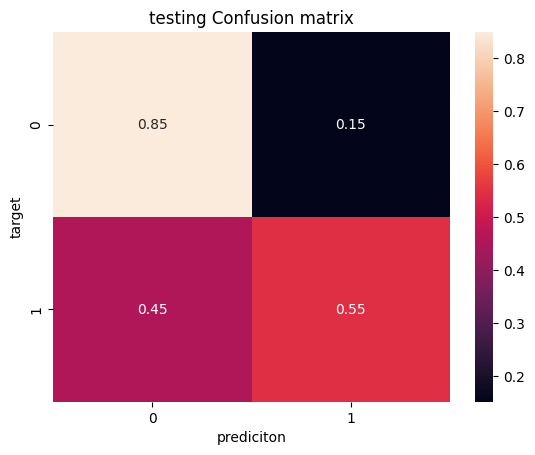

In [74]:
test_preds = predict_and_plot(test_inputs, test_target, 'testing')